# Imports and Functions

In [2]:
import sys
!{sys.executable} -m pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\git\Sleep-Analysis\env\Scripts\python.exe -m pip install --upgrade pip


In [4]:
#Imports
import pandas as pd
from sklearn.preprocessing import StandardScaler #why standard not minmax?
import os #for viewing HTML in web browser
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


def create_df(filepath):
    '''
    Function: Create a df
    Inputs: filepath
    Outputs: df
    '''
    df = pd.read_csv(filepath[0]) #I think the filepath is a tuple? Unsure why

    return df


def to_html(df):
    '''
    Function: Convert the df to HTML, then get the full HTML address so 
    that you can open it in a browser window and see all the rows and columns easily.
    Inputs: df
    Outputs: HTML address
    '''
    df.to_html('df_view.html')
    full_path = os.path.abspath('df_view.html')
    print(full_path)


# Display Pandas dataframes such that they're easy to scroll through
from IPython.display import display, HTML
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns


# Load data

In [7]:
#Load file
filepath=('baseline_clean_df_04172025.csv')

In [9]:
df = pd.read_csv(filepath) #df is the original df

# Preprocessing

The data is in TIDY format, but needs to be in wide format for k-means clustering.

In [33]:
unique_mice = df['UniqueMouse'].unique()
unique_mice

array(['C1-01', 'C1-07', 'C1-14', 'C2-04', 'C2-05', 'C2-09', 'C2-13',
       'C3-04', 'C3-07', 'C3-10', 'C3-14', 'C4-01', 'C4-04', 'C4-06',
       'C4-10', 'C4-15', 'C5-03', 'C5-11', 'C5-14', 'C5-15', 'C6-02',
       'C6-04', 'C6-06', 'C6-09', 'C6-11', 'C6-15', 'C7-02', 'C7-07',
       'C7-14', 'C7-15', 'C8-05', 'C8-06', 'C8-12', 'C8-13', 'C8-16'],
      dtype=object)

In [35]:
for mouse_id in unique_mice:
    mouse_data = df[df['UniqueMouse'] == mouse_id]

In [37]:
mouse_data

,UniqueMouse,Cohort,InjuredGroup,Treatment,HourOfDay,CumulativeHour,PercentSleep
3558,C8-16,C8,mFPI,vehicle,16,17,3.00
3559,C8-16,C8,mFPI,vehicle,17,18,2.56
3560,C8-16,C8,mFPI,vehicle,18,19,42.22
3561,C8-16,C8,mFPI,vehicle,19,20,33.94
3562,C8-16,C8,mFPI,vehicle,20,21,2.39
3563,C8-16,C8,mFPI,vehicle,21,22,3.33
3564,C8-16,C8,mFPI,vehicle,22,23,1.39
3565,C8-16,C8,mFPI,vehicle,23,24,5.00
3566,C8-16,C8,mFPI,vehicle,0,25,1.44
3567,C8-16,C8,mFPI,vehicle,1,26,30.39


# Feature engineering

The data available to me is pretty much only time series sleep percent data at each hour. With k-means clustering, having large quantities of individual columns of data is less usful because of the way that k-means values are calculated. Therefore, it's best to reduce dimensions of the raw data and generate more meaningful features before feeding the data into k-means. Will opt to reduce dimensionality using feature engineering rather than PCA because it will preserve more biological relevance (as opposed to PC1 and PC2 from PCA where we don't even know what any of those mean)

These are the features we'll focus on:

1) Basic stats - Mean sleep per hour, median sleep per hour, standard deviation of sleep per hour
It seems like one of the main recurring themes in sleep research is the variability among individuals. Everyones sleep is very different. Would that suggest that its best to focus on variability rather than averages?

3) Temporal patterns - moving average, rolling standard deviation

In [44]:
# Note I haven't yet tested any of these 

# Assuming df has columns 'subject_id' and 'sleep_percent_hour_1' through 'sleep_percent_hour_X'

# Data is assumed to already be in wide format
features = [] # Create an empty list for features

for subject_id in df['UniqueMouse'].unique(): # for each UniqueMouse
    # print(subject_id) #Testing statement
    subject_data = df[df[subject_id'] == subject_id] # Get all the UniqueMice values 

    sleep_series = subject_data.filter(like='sleep_percent_hour').values.flatten()
    
    # Extract meaningful features
    features_dict = {
        'subject_id': subject_id,
        'mean_sleep': np.mean(sleep_series),
        'std_sleep': np.std(sleep_series),
        'max_consecutive_sleep': calculate_max_consecutive_sleep(sleep_series),
        'day_night_ratio': calculate_day_night_ratio(sleep_series),
        'sleep_regularity': calculate_regularity(sleep_series), # not sure what this would entail
        #could add maybe like Fourier transforms like Claude recommended, don't know what that means, or moving averages
        # Add more relevant features
    }
    features.append(features_dict)

features_df = pd.DataFrame(features)


C1-01
C1-07
C1-14
C2-04
C2-05
C2-09
C2-13
C3-04
C3-07
C3-10
C3-14
C4-01
C4-04
C4-06
C4-10
C4-15
C5-03
C5-11
C5-14
C5-15
C6-02
C6-04
C6-06
C6-09
C6-11
C6-15
C7-02
C7-07
C7-14
C7-15
C8-05
C8-06
C8-12
C8-13
C8-16


"\n    sleep_series = subject_data.filter(like='sleep_percent_hour').values.flatten()\n    \n    # Extract meaningful features\n    features_dict = {\n        'subject_id': subject_id,\n        'mean_sleep': np.mean(sleep_series),\n        'std_sleep': np.std(sleep_series),\n        'max_consecutive_sleep': calculate_max_consecutive_sleep(sleep_series),\n        'day_night_ratio': calculate_day_night_ratio(sleep_series),\n        'sleep_regularity': calculate_regularity(sleep_series), # not sure what this would entail\n        #could add maybe like Fourier transforms like Claude recommended, don't know what that means, or moving averages\n        # Add more relevant features\n    }\n    features.append(features_dict)\n\nfeatures_df = pd.DataFrame(features)\n"

# K Means Clustering

In [23]:
pivot_df = df.pivot(index="UniqueMouse", columns="HourOfDay", values="PercentSleep")

# Join InjuryGroup back in
meta = df.drop_duplicates(subset="UniqueMouse")[["MouseID", "InjuredGroup"]]
pivot_df = pivot_df.merge(meta, on="UniqueMouse")


ValueError: Index contains duplicate entries, cannot reshape

In [10]:
df_k_means = df.filter(items=['HourOfDay', 'CumulativeHour', 'PercentSleep'])

In [11]:
to_html(df_k_means) #Look at the df in a different tab to ensure it looks normal

/Users/kyli/Documents/GitHub/Sleep-Analysis/df_view.html


In [12]:
#Look at k_means without Nans
to_html(df_k_means)
#Should find a better way to visualize this so I see if its actually doing anything

/Users/kyli/Documents/GitHub/Sleep-Analysis/df_view.html


In [13]:
# Standardize data (K-Means works best with normalized data)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_k_means)

In [14]:
# Run K-Means
optimal_k = 3  # Assume we chose 3 from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

In [15]:
df_k_means['Cluster'] = clusters  # Assign clusters to original DataFrame
df_k_means['Mouse_ID'] = df['UniqueMouse']  # Restore Mouse_ID for tracking


In [16]:
#Look at final df
to_html(df_k_means)

/Users/kyli/Documents/GitHub/Sleep-Analysis/df_view.html


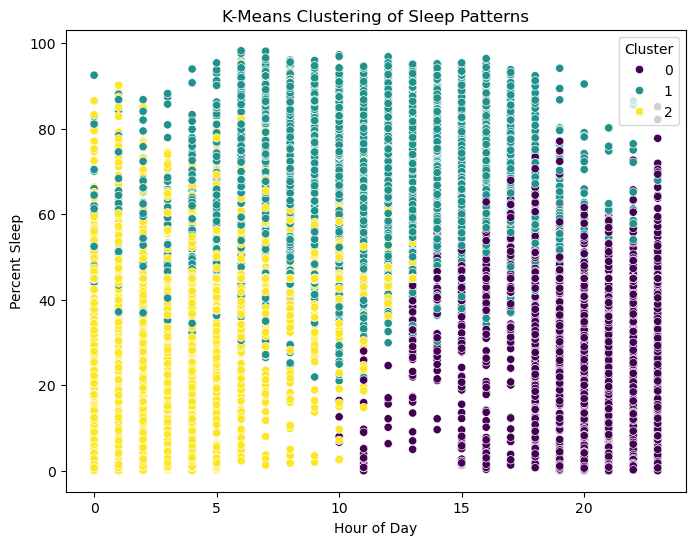

In [17]:
#Visualization of clusters themselves
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['HourOfDay'], y=df_k_means['PercentSleep'], hue=df_k_means['Cluster'], palette="viridis")
plt.xlabel("Hour of Day")
plt.ylabel("Percent Sleep")
plt.title("K-Means Clustering of Sleep Patterns")
plt.legend(title="Cluster")
plt.show()

- Each dot represents an observation (sleep percentage at a given hour)
- We chose to create 3 different clusters
- Three different sleeping "patterns" appearing at different times
- We can't know what the pattern is specifically
***Double check hour of day

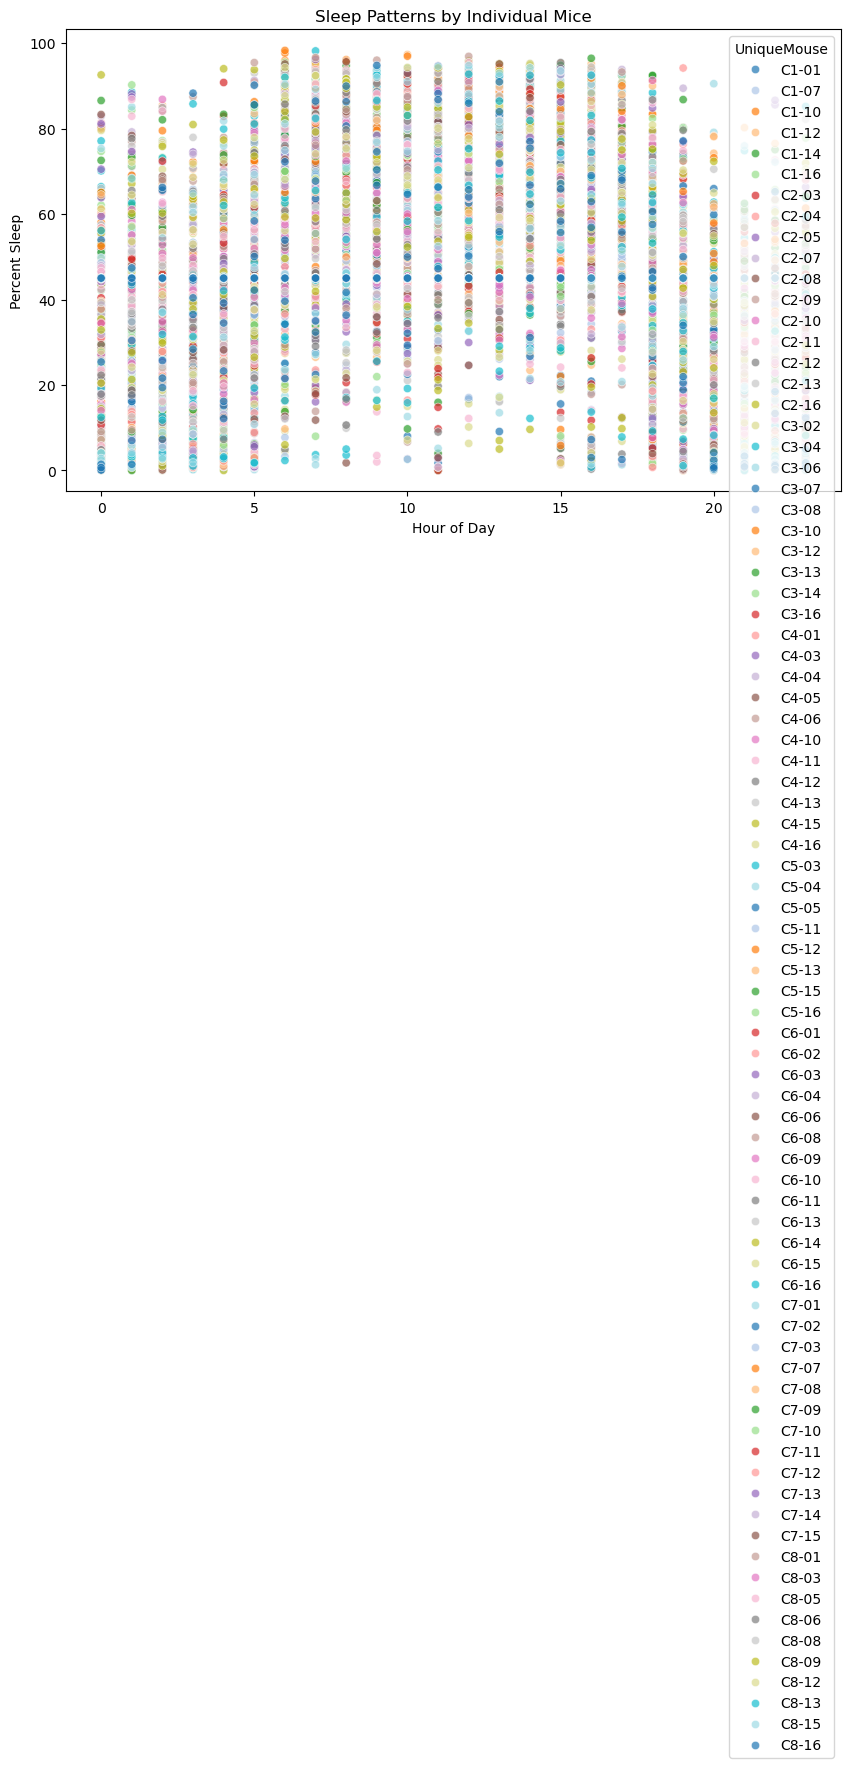

In [18]:
#Cluster by each unique mouse

# Set figure size
plt.figure(figsize=(10, 6))

# Scatter plot with individual mice colors
sns.scatterplot(data=df, x='HourOfDay', y='PercentSleep', hue='UniqueMouse', palette='tab20', alpha=0.7)

# Labels and title
plt.xlabel("Hour of Day")
plt.ylabel("Percent Sleep")
plt.title("Sleep Patterns by Individual Mice")
#plt.legend(title="Mouse ID", bbox_to_anchor=(1.05, 1), loc='lower left')  # Move legend outside
plt.show()


- Probably should look random because its baseline
- Probably should use cumulative hour

In [19]:
cohort_df = df[df['Cohort'] == 'C3']

In [20]:
to_html(cohort_df)

/Users/kyli/Documents/GitHub/Sleep-Analysis/df_view.html


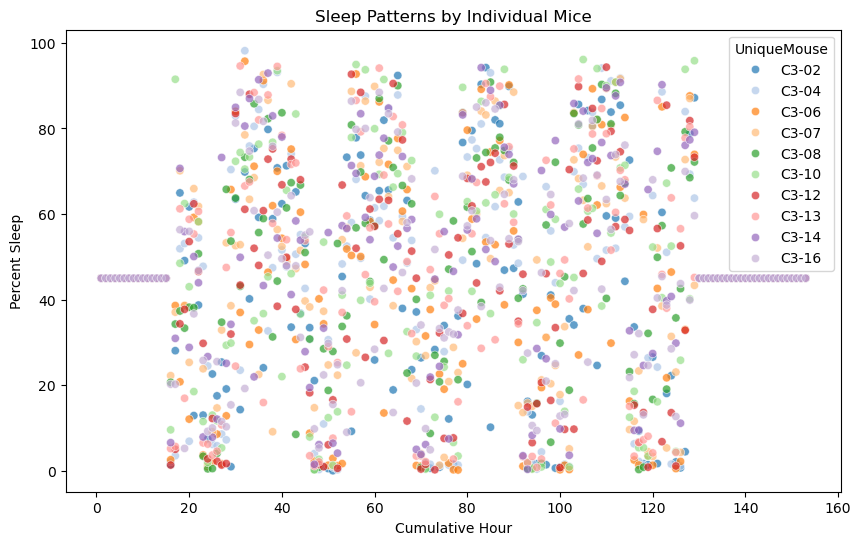

In [21]:
#Cluster by each unique mouse

# Set figure size
plt.figure(figsize=(10, 6))

# Scatter plot with individual mice colors
sns.scatterplot(data=cohort_df, x='CumulativeHour', y='PercentSleep', hue='UniqueMouse', palette='tab20', alpha=0.7)

# Labels and title
plt.xlabel("Cumulative Hour")
plt.ylabel("Percent Sleep")
plt.title("Sleep Patterns by Individual Mice")
#plt.legend(title="Mouse ID", bbox_to_anchor=(1.05, 1), loc='lower left')  # Move legend outside
plt.show()


- This is kind of just like a sleep percent graph but with dots
- What I did here made k-means kind of useless, should go back to trying to identify clusters

In [22]:
#Next want to visualize 3 clusters with x axis CumulativeHour instead of HourOfDay and with only one cohort at a time.
#Change code cell below to accomplish that

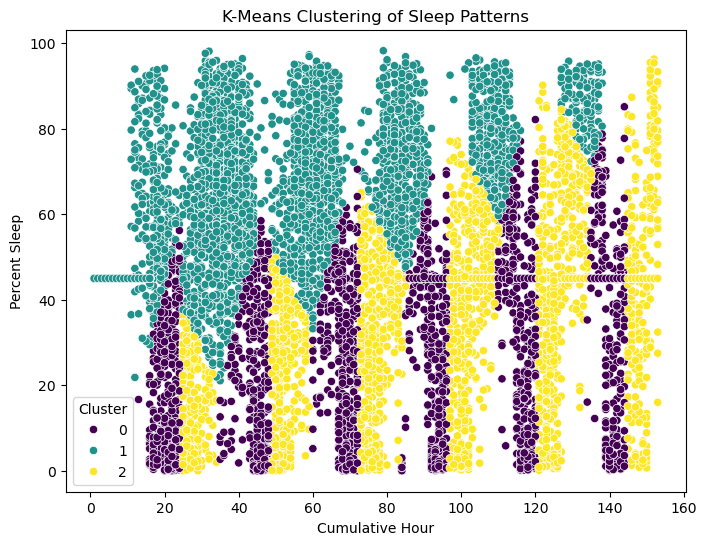

In [23]:
#Visualization of clusters themselves
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['CumulativeHour'], y=df_k_means['PercentSleep'], hue=df_k_means['Cluster'], palette="viridis")
plt.xlabel("Cumulative Hour")
plt.ylabel("Percent Sleep")
plt.title("K-Means Clustering of Sleep Patterns")
plt.legend(title="Cluster")
plt.show()

***Cut out first 24 hours and see how graph is reclustered


# Hierarchical Clustering

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features for clustering
df_hier = df[['PercentSleep', 'HourOfDay', 'CumulativeHour']]

# Standardize data (important for distance-based methods)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_hier)


In [25]:
to_html(df_hier)

/Users/kyli/Documents/GitHub/Sleep-Analysis/df_view.html


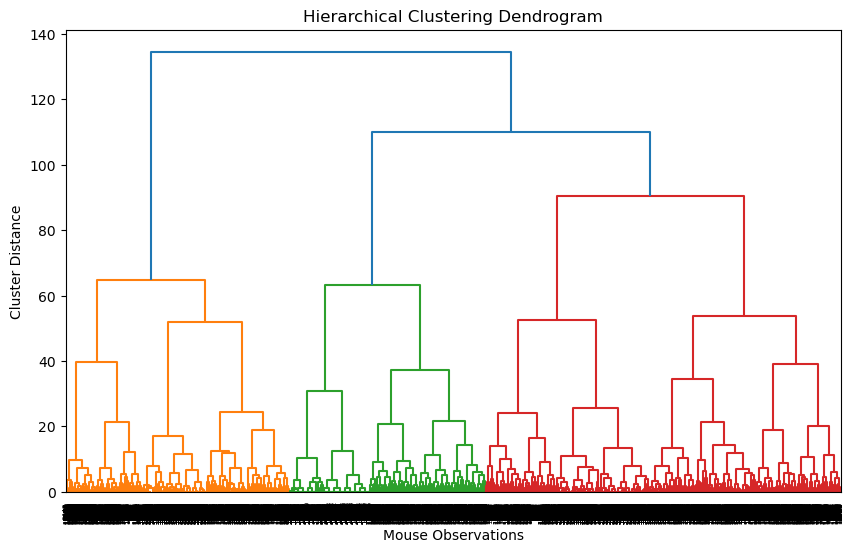

In [26]:
# Compute hierarchical clustering
linked = linkage(df_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Mouse Observations")
plt.ylabel("Cluster Distance")
plt.show()

#Throws an error because of NaNs, although I thought I got rid of Nans already

- Hierarchical clustering achieves the same objective as k means, I'll come back to it later

# Factor Analysis

In [27]:
from sklearn.decomposition import FactorAnalysis

# Define number of latent features (e.g., 2)
n_factors = 2
fa = FactorAnalysis(n_components=n_factors)
latent_features = fa.fit_transform(df_scaled)

# Add latent features to DataFrame
df_factors = pd.DataFrame(latent_features, columns=[f'Factor_{i+1}' for i in range(n_factors)])
df = df.join(df_factors)

# View the first few rows
print(df.head())


  StudyPart UniqueMouse Cohort InjuredGroup Treatment  Included Lights  \
0  Baseline       C1-01     C1         Sham   vehicle  Included    Off   
1  Baseline       C1-01     C1         Sham   vehicle  Included    Off   
2  Baseline       C1-01     C1         Sham   vehicle  Included    Off   
3  Baseline       C1-01     C1         Sham   vehicle  Included    Off   
4  Baseline       C1-01     C1         Sham   vehicle  Included    Off   

   HourOfDay  CumulativeHour  Day Paired Hours  DoseMarker  PercentSleep  \
0        0.0             1.0  1.0          NaN         0.0     45.002156   
1        1.0             2.0  1.0          NaN         0.0     45.002156   
2        2.0             3.0  1.0          NaN         0.0     45.002156   
3        3.0             4.0  1.0          NaN         0.0     45.002156   
4        4.0             5.0  1.0          4&5         0.0     45.002156   

   SleepBout  Factor_1  Factor_2  
0        NaN -0.548413 -0.632181  
1        NaN -0.504431 -0.61

In [28]:
- Goal: Find latent sleep features

SyntaxError: illegal target for annotation (1661375700.py, line 1)

In [ ]:
factor_loadings = pd.DataFrame(fa.components_.T,  # Transpose to match features
                               index=['HourOfDay', 'CumulativeHour', 'PercentSleep'],  # Use your numerical columns
                               columns=[f'Factor_{i+1}' for i in range(n_factors)])

# View the factor loadings
print(factor_loadings)


- The table above shows how strongly each original variable contributes to factor 1 and factor 2
- Scale of -1 to 1
- Probably what we would expect for just baseline? Hard to to make "factors" that represent differences because the mice are generally the same, so factor values are low

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `factor_loadings` is the FA output table
plt.figure(figsize=(8, 5))
sns.heatmap(factor_loadings, annot=True, cmap="coolwarm")
plt.title("Factor Loadings Heatmap")
plt.show()


- Graphical representation of above table